In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import decomposition

In [2]:
data = pd.DataFrame(pd.read_csv("FinalSample.csv"))

In [3]:
data.shape

(10000, 23)

In [4]:
data.head()

,RecipeId,Name,RecipeCategory,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,...,ProteinContent,RecipeServings,CookTime,PrepTime,TotalTime,Review_Class,IngredientsCount,minimum_rating,maximum_rating,mean_of_rating
0,3689,Amish Pot Roast,Very Low Carbs,5.0,17.0,337.3,11.0,3.5,138.5,812.7,...,52.0,6.0,0,0,0,average,8,0.0,5.0,4.375
1,176008,The Cavorting Chef's Fabulous Fruit Pizza,Dessert,5.0,7.0,447.8,20.7,7.9,39.8,302.7,...,4.8,10.0,15,25,40,average,9,5.0,5.0,5.000
2,90001,Bacon Cheeseburger Potato Pie,Potato,5.0,42.0,489.6,26.9,11.2,100.5,721.0,...,32.4,6.0,45,15,60,average,14,0.0,5.0,4.475
3,40852,Sauteed Salmon With Lime-Honey Sauce,Vietnamese,4.0,6.0,272.2,11.6,4.6,102.8,154.6,...,33.9,4.0,9,5,14,average,6,2.0,5.0,3.800
4,14092,Mexican Layer Dip - YUMMM,Vegetable,5.0,7.0,422.0,36.7,17.3,80.9,703.0,...,12.5,6.0,0,20,20,average,11,5.0,5.0,5.000


In [5]:
data = data.drop(['RecipeId', 'Name', "RecipeCategory", 'minimum_rating', 'maximum_rating'], axis=1)

In [6]:
data.head()

,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,CookTime,PrepTime,TotalTime,Review_Class,IngredientsCount,mean_of_rating
0,5.0,17.0,337.3,11.0,3.5,138.5,812.7,4.8,0.7,1.8,52.0,6.0,0,0,0,average,8,4.375
1,5.0,7.0,447.8,20.7,7.9,39.8,302.7,62.6,1.8,31.4,4.8,10.0,15,25,40,average,9,5.000
2,5.0,42.0,489.6,26.9,11.2,100.5,721.0,28.9,2.3,4.6,32.4,6.0,45,15,60,average,14,4.475
3,4.0,6.0,272.2,11.6,4.6,102.8,154.6,7.9,0.9,4.9,33.9,4.0,9,5,14,average,6,3.800
4,5.0,7.0,422.0,36.7,17.3,80.9,703.0,13.1,3.9,4.6,12.5,6.0,0,20,20,average,11,5.000


In [7]:
data.shape
corr = data.corr()

In [8]:
corr

,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,CookTime,PrepTime,TotalTime,IngredientsCount,mean_of_rating
AggregatedRating,1.000000,0.076399,-0.007554,0.024751,0.020396,-0.023939,-0.016550,-0.022224,-0.015936,0.023541,-0.045654,-0.000253,-0.065352,0.006493,-0.058514,-0.013306,0.618832
ReviewCount,0.076399,1.000000,0.006709,0.006913,0.007768,0.030027,0.043710,-0.008966,-0.037287,-0.000256,0.026016,0.016711,0.024798,-0.001187,0.022479,0.004549,-0.005316
Calories,-0.007554,0.006709,1.000000,0.842040,0.728815,0.618969,0.550165,0.583960,0.319822,0.157431,0.682735,-0.208327,0.123683,0.088170,0.145952,0.269510,0.009979
FatContent,0.024751,0.006913,0.842040,1.000000,0.860988,0.597958,0.458990,0.190469,0.135569,0.013341,0.519196,-0.140682,0.093761,0.073078,0.113024,0.208679,0.029859
SaturatedFatContent,0.020396,0.007768,0.728815,0.860988,1.000000,0.604067,0.384508,0.194280,0.060657,0.047404,0.412459,-0.100448,0.079671,0.050922,0.093137,0.147196,0.021016
CholesterolContent,-0.023939,0.030027,0.618969,0.597958,0.604067,1.000000,0.434090,0.058368,-0.065540,-0.056376,0.716672,-0.158685,0.132284,0.064045,0.144527,0.195416,-0.020207
SodiumContent,-0.016550,0.043710,0.550165,0.458990,0.384508,0.434090,1.000000,0.227951,0.213992,-0.110753,0.554616,-0.184181,0.148219,0.084150,0.166627,0.261617,-0.005407
CarbohydrateContent,-0.022224,-0.008966,0.583960,0.190469,0.194280,0.058368,0.227951,1.000000,0.512910,0.477645,0.102043,-0.083729,0.023195,0.052051,0.040813,0.205577,-0.015622
FiberContent,-0.015936,-0.037287,0.319822,0.135569,0.060657,-0.065540,0.213992,0.512910,1.000000,0.038576,0.126550,-0.181363,0.057695,0.023907,0.061382,0.258567,0.020451
SugarContent,0.023541,-0.000256,0.157431,0.013341,0.047404,-0.056376,-0.110753,0.477645,0.038576,1.000000,-0.176796,0.066692,0.008936,0.016789,0.016872,0.042081,0.017909


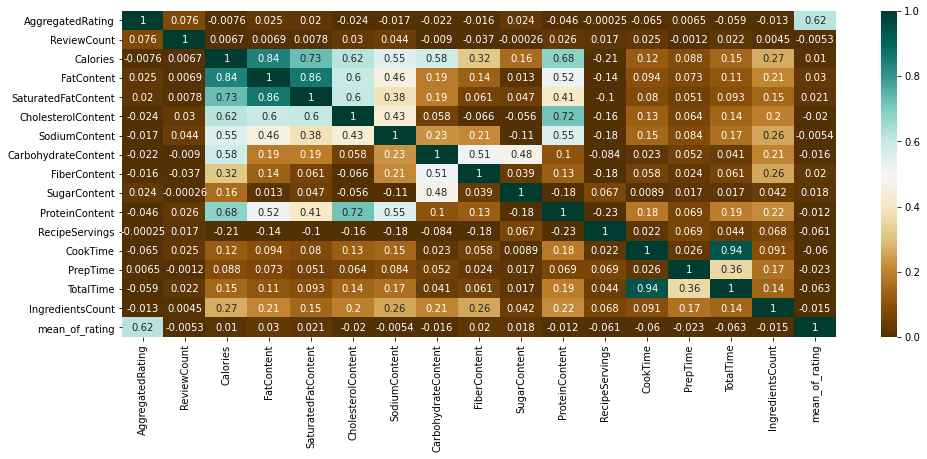

In [9]:
plt.figure(figsize=(16, 6))
ax = sns.heatmap(data.corr(), vmin=0, vmax=1, annot=True, cmap='BrBG')